# Preprocessing Data

In [1]:
import pandas as pd
import numpy as np 

Read Data File

In [2]:
train_data = pd.read_csv("FordA_TRAIN.txt", sep = ' ', header=None)
test_data = pd.read_csv("FordA_TEST.txt", sep = ' ', header=None)
x1, y1 = train_data.shape
x2, y2 = test_data.shape
x_train, y_train = train_data[0:y1-1], train_data[y1-1]
x_test,  y_test   = test_data[0:y2-1],   test_data[y2-1]

replace label '-1' with '0'

In [3]:
y_train = np.array(y_train.replace(to_replace=-1, value=0))
y_test = np.array(y_test.replace(to_replace=-1, value=0))

Normalization：x->[-1.0,1.0]

In [4]:
# def normalization(data):
#     _range = np.max(abs(data))
#     return data / _range
# x_train = normalization(x_train).values.reshape(x1, y1, 1)
# x_test = normalization(x_test).values.reshape(x1, y2, 1)
def normalize(data):
    _range = np.max(abs(data))
    return data / _range
    return data
x_train = normalize(train_data).values.reshape( x1, y1, 1)
x_test = normalize(test_data).values.reshape(x2, y2, 1)

# CNN Classification

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Activation

Convolutional & Pooling Layers=MaxPooling

Conv=>Relu=>Pool=>Conv=>Pool

In [6]:
model = models.Sequential()

# Paper Parameters
conv1_filter = [5, 7, 9]
conv1_num = [2, 3, 6, 9]
conv2_filter = [5, 7, 9]
conv2_num = [4, 6, 9, 12, 15]
pool_size = [2, 3, 4, 5]

model.add(layers.Conv1D(6,7,activation='relu',input_shape=(y1, 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(12,7,activation='relu'))
model.add(layers.MaxPooling1D(3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 495, 6)            48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 165, 6)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 159, 12)           516       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 12)            0         
Total params: 564
Trainable params: 564
Non-trainable params: 0
_________________________________________________________________


Convolutional & Pooling Layers=MeanPooling

In [7]:
# model = models.Sequential()

# #  parameters
# conv1_filter = [5, 7, 9]
# conv1_num = [2, 3, 6, 9]
# conv2_filter = [5, 7, 9]
# conv2_num = [4, 6, 9, 12, 15]
# pool_size = [2, 3, 4, 5]
# model.add(layers.Conv1D(filters=conv1_num[0], kernel_size = conv2_filter,
#                         padding='same',activation='relu',input_shape=(y1, 1)))
# model.add(layers.AveragePooling1D())
# model.add(layers.Conv1D(filters=conv2_num[0], kernel_size=conv2_filter)
# model.add(layers.AveragePooling1D())
# model.summary()

Feature Layers

In [8]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.02))
model.add(layers.Dense(32, activation='relu',input_dim=y1))
model.add(layers.Dropout(0.02))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 495, 6)            48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 165, 6)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 159, 12)           516       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 12)            0         
_________________________________________________________________
flatten (Flatten)            (None, 636)               0         
_________________________________________________________________
dropout (Dropout)            (None, 636)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

Model Compile

In [9]:
model.compile(optimizer='rmsprop', 
             loss='mse',
             metrics=['accuracy'])
# model.compile(optimizer = 'adam',
#               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 495, 6)            48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 165, 6)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 159, 12)           516       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 12)            0         
_________________________________________________________________
flatten (Flatten)            (None, 636)               0         
_________________________________________________________________
dropout (Dropout)            (None, 636)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16)

Train on 3601 samples
Epoch 1/20
3601/3601 [==============================] - 3s 772us/sample - loss: 0.1987 - accuracy: 0.6848
Epoch 2/20
3601/3601 [==============================] - 2s 446us/sample - loss: 0.0826 - accuracy: 0.9175
Epoch 3/20
3601/3601 [==============================] - 2s 453us/sample - loss: 0.0143 - accuracy: 0.9942
Epoch 4/20
3601/3601 [==============================] - 2s 461us/sample - loss: 0.0021 - accuracy: 0.9994
Epoch 5/20
3601/3601 [==============================] - 2s 448us/sample - loss: 7.2901e-04 - accuracy: 0.9994
Epoch 6/20
3601/3601 [==============================] - 2s 439us/sample - loss: 1.8651e-04 - accuracy: 1.0000
Epoch 7/20
3601/3601 [==============================] - 2s 439us/sample - loss: 2.6239e-04 - accuracy: 0.9997
Epoch 8/20
3601/3601 [==============================] - 2s 450us/sample - loss: 1.0381e-04 - accuracy: 0.9997
Epoch 9/20
3601/3601 [==============================] - 2s 440us/sample - loss: 4.2371e-05 - accuracy: 1.0000
Epoc

In [11]:
y_pred = model.predict(x_test, batch_size = 1)

In [12]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
# y_test,, y_pred

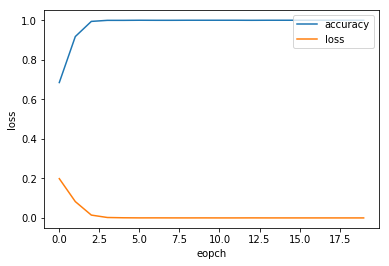

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('eopch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()